In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
def SPSA(psi_est, nu_ite, fun_teor, fun,
          s=1, t=1/6, a=3, A=1, b = 0.1 ):
    """
    SPSA
    IN
        psi_est: dim x n_par matrix. dim is de dimension of each vector, and n_par
                the number of guesses in parallel.
        nu_ite: int. Number of iterations of SPSA.
        fun_teor: function. It is the known function, for example, the theoretical
                 fidelity between the unknown state of the system and the guess.
        fun: function. SPSA uses this function for the optimization.
        s, t, a, A, b: parametros SPSA
    OUT
        valor_optimo: real. Optimal value of fun finded by SPSA.
    """

    n_par = int(psi_est.size/psi_est.shape[0])
    valor_optimo = np.zeros((n_par, nu_ite))
    valor_optimo[:,0] = fun_teor(psi_est)

    for k in range(0,nu_ite-1):
        if k % 5 == 0:
            print(k)
        else:
            pass
        valor_optimo[:,k+1], psi_est = (itSPSA(psi_est/np.linalg.norm(psi_est, axis = 0),
                                       k, s, t, a, A, b, fun, fun_teor ))


    return valor_optimo

In [54]:
def itSPSA(z_k,  k, s, t, a, A, b, fun, fun_teor):
    """iteracion de SPSA
    IN
        z_k: dim x n_rep. Cada columna es un estimador de dimension dim.
        k: iteracion
        s, t, a, A, b: parametros SPSA
        fun: funcion a optimizar
    OUT
        z_k: dim x n_rep. Estimador actualizado
        z_value: real. valor de fun en el estimador z_k
    """
    dim = z_k.shape[0]
    rep = int(z_k.size/z_k.shape[0])
    alpha = a/(k+1+A)**s
    beta = b/(k+1)**t
    
    #Cambiamos un delta complejo por uno real (+1,-1)
    
    delta = (-1)**(np.random.randint(1,5,(dim, rep))).reshape(2,rep)
    
    #Definimos parte real e imaginaria
    
    z_k_mas_r = np.real(z_k) + beta*delta
    z_k_mas_i = np.imag(z_k) + beta*delta
    z_k_menos_r = np.real(z_k) - beta*delta
    z_k_menos_i = np.imag(z_k) - beta*delta
    
    #Nuevo estado, normalizado
    
    z_k_mas = z_k_mas_r +1j*z_k_mas_i
    z_k_menos = z_k_menos_r+1j*z_k_menos_i
    
    z_k_mas = z_k_mas/np.linalg.norm(z_k_mas, axis=0)
    z_k_menos = z_k_menos/np.linalg.norm(z_k_menos, axis=0)
    
    fun_k_mas = fun(z_k_mas)
    fun_k_menos = fun(z_k_menos)
    grad = np.divide(fun_k_mas - fun_k_menos, 2*beta*delta.conj())
    z_k = z_k - alpha*grad
    z_value = fun_teor(z_k)
    return z_value, z_k

In [55]:
def estado(dim, n_par):
    psi = (np.random.normal(loc=0.0, scale=1.0,
           size=(dim, n_par))
           + np.random.normal(loc=0.0, scale=1.0,
           size=(dim, n_par))*1j)
    psi = psi/np.linalg.norm(psi, axis=0)
    return psi

In [56]:
def H_paul (A,B,C):
    pauli_x = np.array((((0, 1), (1, 0))))
    pauli_y = np.array((((0, -1j), (1j, 0))))
    pauli_z = np.array((((1, 0), (0, -1))))
    H_paul = A*pauli_x + B*pauli_y + C*pauli_z
    return H_paul

In [57]:
def exp_H (psi_est, H):
    psi = np.matrix(psi_est)
    psi = psi/np.linalg.norm(psi, axis=0)
    psi_dagger = psi.getH()
    H = np.matrix(H)
    exp_H = psi_dagger*H*psi
    return exp_H

In [58]:
d = 2
nu_par = 1
NU_ITERACIONES = 300

A = np.sqrt(0.3)
B = np.sqrt(0.2)
C = np.sqrt(0.5)
#A = 1
#B = 3
#C = 5

In [59]:
psi_est = estado(d,nu_par)


In [60]:
H = H_paul(A,B,C)


In [61]:
fun = lambda x : exp_H(x, H)


In [62]:
Result = SPSA(psi_est, NU_ITERACIONES, fun, fun)

/home/dmunoz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
/home/dmunoz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: ComplexWarning: Casting complex values to real discards the imaginary part


0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295


In [63]:
np.savetxt('prueba.txt', Result, delimiter=',')
print(Result)

[[ 0.67922174  0.39651629  0.42521911  0.4373201   0.16505249  0.20145242
  -0.26282222 -0.50778762 -0.54695862 -0.55428737 -0.42672166 -0.54896734
  -0.48140377 -0.45367635 -0.43944947 -0.43139269 -0.42656163 -0.53415225
  -0.51270534 -0.4998174  -0.56550375 -0.54574267 -0.58947799 -0.56923276
  -0.55605146 -0.5942966  -0.61789278 -0.63307646 -0.64319136 -0.62098157
  -0.63536603 -0.64533978 -0.62681677 -0.63952644 -0.62454733 -0.61347919
  -0.60515153 -0.62363482 -0.61489182 -0.60814454 -0.62531781 -0.63818212
  -0.64797645 -0.65553937 -0.66145111 -0.66612162 -0.66984607 -0.67284061
  -0.66084678 -0.65121087 -0.65792059 -0.66334935 -0.65444971 -0.64714856
  -0.64111754 -0.63610478 -0.64538048 -0.64031582 -0.64873996 -0.64371378
  -0.65146853 -0.65792674 -0.65244088 -0.64777845 -0.65471714 -0.66056797
  -0.65552941 -0.65120525 -0.64748049 -0.64426114 -0.64146988 -0.63904279
  -0.63692673 -0.64494138 -0.65180619 -0.65771506 -0.66282421 -0.66726033
  -0.66314536 -0.66750862 -0.67132449 

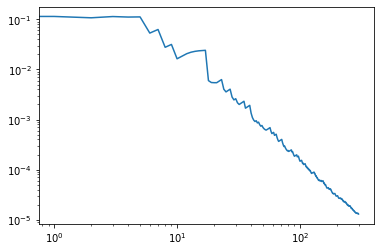

In [64]:
x = range(0,300)
plt.loglog(np.array(error[:]).T)

In [28]:
E = A**2 + B**2 + C**2

const1 = np.sqrt(1/2) * np.sqrt((A**2+B**2)/(E-C*(np.sqrt(E))))
const2 = (C-np.sqrt(E))/(A+1j*B)

psi_teo = const1*np.matrix([[const2], [1]])

fun(psi_teo)

matrix([[-1.+0.j]])

In [19]:
print(psi_est)
fun(psi_est)

[[ 0.36809417+0.09990709j]
 [-0.41783922-0.8245821j ]]


matrix([[-0.99424503+0.j]])

In [ ]:
Ground_teo = -(np.sqrt(A**2 + B**2 + C**2))
print(Ground_teo)

error = Result - Ground_teo
print(error)